## Lab 2: Supervised Learning

In this lab, we prepare data for a linear regression to answer our research question, " "

Load packages and data

In [50]:
import pandas as pd
import numpy as np
from ggplot import *

data_path = '/Users/h/Desktop'

In [8]:
loans_full=pd.read_csv(data_path+'/loans_full.csv', low_memory=False, index_col=0)
loans_details=pd.read_csv(data_path+'/loans_details.csv', low_memory=False, index_col=0)

In [18]:
additional_columns =  loans_full.columns.difference(loans_details.columns).tolist() + ['id']
df = loans_details.merge(loans_full[['id', 'borrower_count']], left_on='id', right_on='id')

## Check for linear relationship ( scatter plot examples of linear and non-linear from kiva data)

Use ggplot to plot and format graphs. 

Try plotting different variables

Try changing the color of the scatter plot 

In [10]:
df.columns

Index(['activity', 'basket_amount', 'bonus_credit_eligibility', 'borrowers',
       'currency_exchange_loss_amount', 'description.languages',
       'description.texts.en', 'description.texts.es', 'description.texts.fr',
       'description.texts.ru', 'funded_amount', 'funded_date', 'id',
       'image.id', 'image.template_id', 'journal_totals.bulkEntries',
       'journal_totals.entries', 'lender_count', 'loan_amount',
       'location.country', 'location.country_code', 'location.geo.level',
       'location.geo.pairs', 'location.geo.type', 'location.town', 'name',
       'partner_id', 'payments', 'planned_expiration_date', 'posted_date',
       'sector', 'status', 'tags', 'terms.disbursal_amount',
       'terms.disbursal_currency', 'terms.disbursal_date', 'terms.loan_amount',
       'terms.local_payments', 'terms.loss_liability.currency_exchange',
       'terms.loss_liability.currency_exchange_coverage_rate',
       'terms.loss_liability.nonpayment', 'terms.repayment_interval',
     

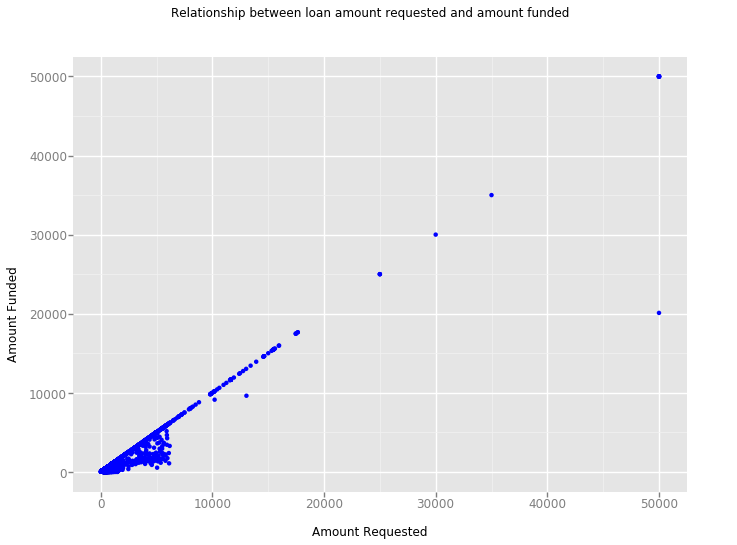

<ggplot: (178299607062)>

In [5]:
ggplot(loans_full, aes(x='loan_amount', y='funded_amount')) + geom_point(color = "blue") + \
ggtitle("Relationship between loan amount requested and amount funded") + xlab("Amount Requested") + ylab("Amount Funded")

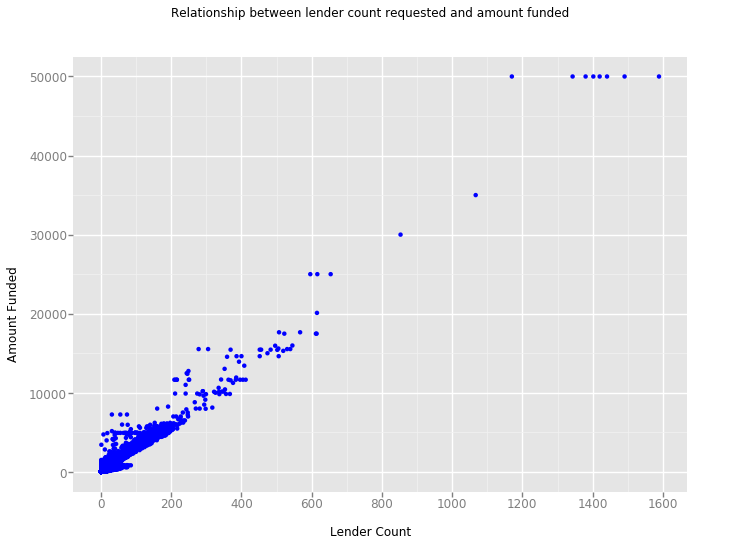

<ggplot: (-9223371858595993421)>

In [6]:
ggplot(loans_full, aes(x='lender_count', y='funded_amount')) + geom_point(color = "blue") + \
ggtitle("Relationship between lender count requested and amount funded") + xlab("Lender Count") + ylab("Amount Funded")

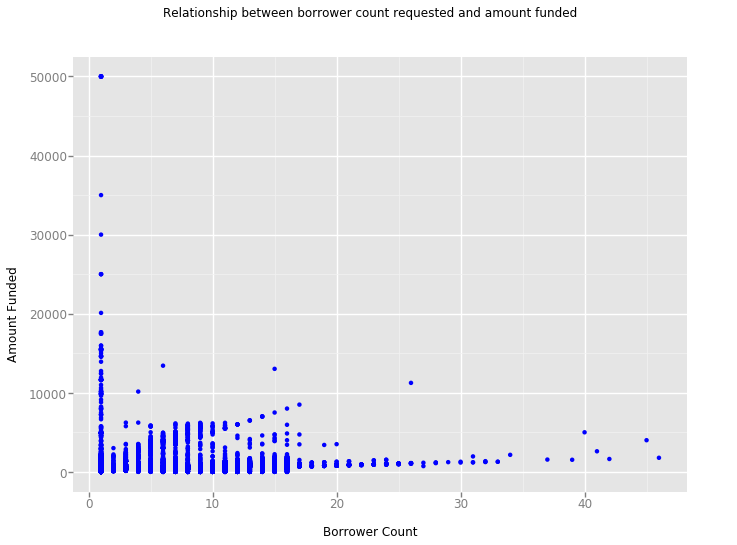

<ggplot: (113447437944)>

In [8]:
ggplot(loans_full, aes(x='borrower_count', y='funded_amount')) + geom_point(color = "blue") + \
ggtitle("Relationship between borrower count requested and amount funded") + xlab("Borrower Count") + ylab("Amount Funded")

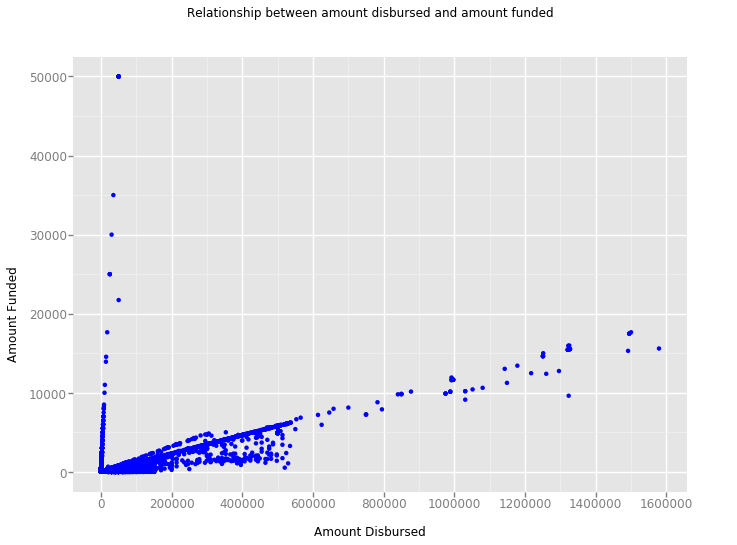

<ggplot: (178268574777)>

In [11]:
ggplot(df, aes(x='terms.disbursal_amount', y='funded_amount')) + geom_point(color = "blue") + \
ggtitle("Relationship between amount disbursed and amount funded") + xlab("Amount Disbursed") + ylab("Amount Funded")

## Normal distribution of variables (plot histogram tables)

Histograms are graphs consisting of rectangles whose height is proportional to the frequency of a variable and whose width is equal to the class interval (binwidth).

Try setting different binwidths.

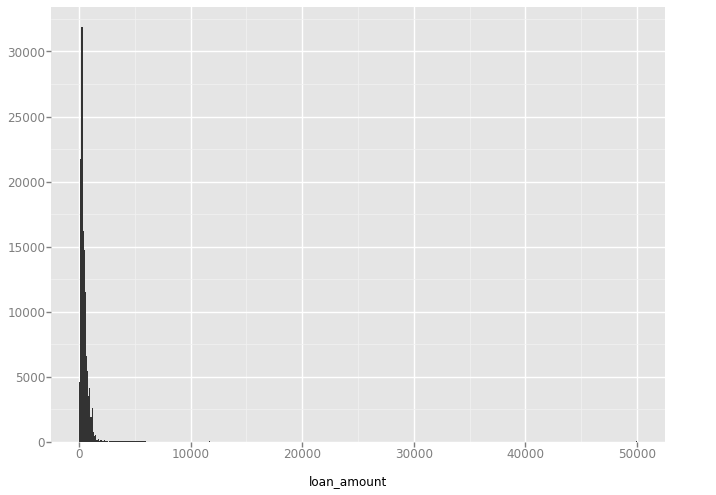

<ggplot: (99495889819)>


In [17]:
h = ggplot(loans_full, aes(x='loan_amount')) + geom_histogram(binwidth=100)
print(h)

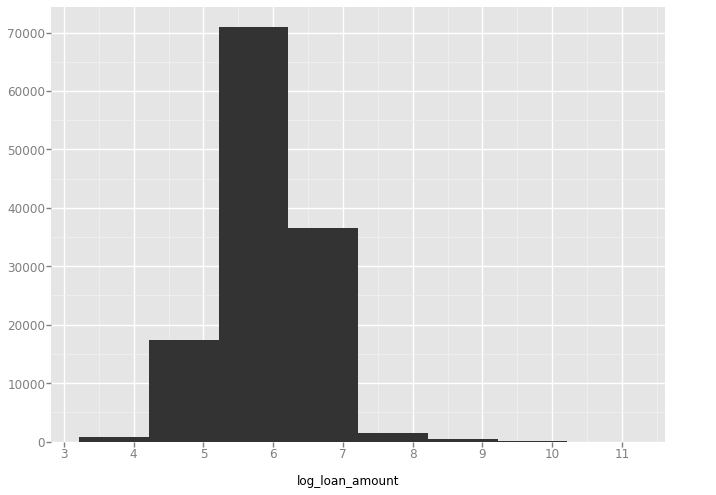

<ggplot: (113455534077)>


In [16]:
loans_full['log_loan_amount'] = np.log(loans_full['loan_amount'])

h = ggplot(loans_full, aes(x='log_loan_amount')) + geom_histogram(binwidth=1)
print(h)

## No multicollinearity (correlation)

Numpy's Corrcoef function returns a matrix of Pearson correlation coefficients.  

In [30]:
np.corrcoef(loans_full.borrower_count, loans_full.funded_amount)

array([[ 1.        ,  0.20696554],
       [ 0.20696554,  1.        ]])

## No autocorrelation (example of variable ploted against itself as autocorrelation, other examples)

## Homoscedasticity (show code to test)

You can use scatter plots to check for homoscedasticity. 

You can also use Bartlett's test for equal variances. Bartlett's test tests the null hypothesis that all input samples are from populations with equal variances. The returned statistic can be interpreted ...

In [7]:
import scipy
scipy.stats.bartlett(loans_full.borrower_count, loans_full.funded_amount)


BartlettResult(statistic=1205632.2556166337, pvalue=0.0)

## Linear Regression code ( divide into training and test, run linear regression, scatter plots of fit)

Divide data into training and test sets. 
Training set should be larger than the test set. For this example, we randomly divide the data 80%-20%

We run an OLS regression using the statsmodels package on the training data 

In [18]:
import statsmodels.formula.api as sm

#to be updated: use scikit learn for easier split - "splittraintest" 

# Set training-test split  
split_pct = 0.80

# the pandas command sample already randomizes. 
loans_full_shuffled = loans_full.sample(frac=1)

train_set = loans_full_shuffled[:int((len(loans_full_shuffled)+1*split_pct))] 
test_set = loans_full_shuffled[int(len(loans_full_shuffled)*split_pct+1):]  

result = sm.ols(formula="funded_amount ~ lender_count", data=train_set).fit()

print(result.summary())


#potential research questions
#Moringa partner regression example (use partner id cross ref – partner id is part of loan id) 
#Research question – time to fund ~ term of loan (loans under 8mo funded quickly) + soc performance index 

                            OLS Regression Results                            
Dep. Variable:          funded_amount   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.451e+06
Date:                Thu, 18 May 2017   Prob (F-statistic):               0.00
Time:                        14:29:54   Log-Likelihood:            -8.4926e+05
No. Observations:              127759   AIC:                         1.699e+06
Df Residuals:                  127757   BIC:                         1.699e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -7.9321      0.647    -12.265   

## Validation

Generate predicted y for each observation in the test set using the parameters generated from the training set. 

In [27]:
params = result.params

test_set['intercept'] = params[0]
test_set['beta1'] = params[1]

C:\Users\h\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\h\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\h\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

103792      32.022905
22186      640.458091
42862      352.251950
68828     1857.328465
Name: beta1xlenderct, dtype: float64